       name           location                     Date  Rating  \
0     Helen  Wichita Falls, TX  Reviewed Sept. 13, 2023     5.0   
1  Courtney         Apopka, FL   Reviewed July 16, 2023     5.0   
2  Daynelle  Cranberry Twp, PA    Reviewed July 5, 2023     5.0   
3    Taylor        Seattle, WA    Reviewed May 26, 2023     5.0   
4   Tenessa        Gresham, OR   Reviewed Jan. 22, 2023     5.0   

                                              Review  \
0  Amber and LaDonna at the Starbucks on Southwes...   
1  ** at the Starbucks by the fire station on 436...   
2  I just wanted to go out of my way to recognize...   
3  Me and my friend were at Starbucks and my card...   
4  I’m on this kick of drinking 5 cups of warm wa...   

                                         Image_Links  \
0                                      ['No Images']   
1                                      ['No Images']   
2  ['https://media.consumeraffairs.com/files/cach...   
3                                   

C:\Users\Pooja\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\Pooja\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\Pooja\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(ave

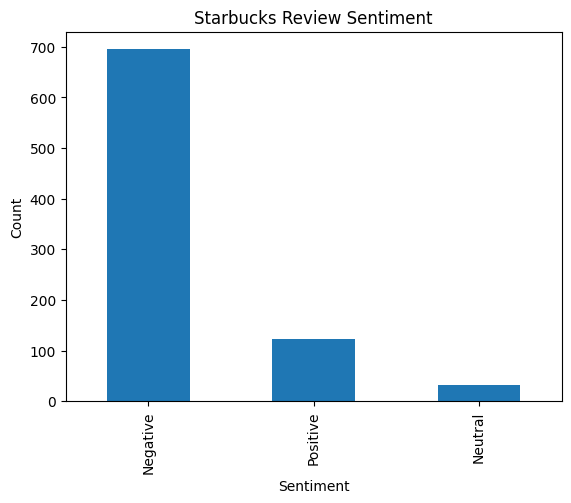

In [8]:
# ===============================
# 1. Import Required Libraries
# ===============================
import pandas as pd
import re
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report


# ===============================
# 2. Load Dataset
# ===============================
df = pd.read_csv(r"C:\task\starbugs review data.csv")
print(df.head())


# ===============================
# 3. Text Preprocessing
# ===============================
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"http\S+", "", text)      # remove URLs
    text = re.sub(r"[^a-z\s]", "", text)     # remove punctuation & numbers
    text = re.sub(r"\s+", " ", text).strip()
    return text

# assuming first column contains review text
df["clean_text"] = df.iloc[:, 0].apply(clean_text)


# ===============================
# 4. Create Sentiment Labels (VALID METHOD)
# ===============================
# ⚠️ Replace 'Rating' with your actual rating column name
def rating_to_sentiment(r):
    if r >= 4:
        return "Positive"
    elif r == 3:
        return "Neutral"
    else:
        return "Negative"

df["sentiment"] = df["Rating"].apply(rating_to_sentiment)

print(df["sentiment"].value_counts())


# ===============================
# 5. Feature Extraction (TF-IDF)
# ===============================
vectorizer = TfidfVectorizer(stop_words="english", max_features=5000)
X = vectorizer.fit_transform(df["clean_text"])
y = df["sentiment"]


# ===============================
# 6. Train-Test Split
# ===============================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


# ===============================
# 7. Model Training (Naive Bayes)
# ===============================
model = MultinomialNB()
model.fit(X_train, y_train)


# ===============================
# 8. Model Evaluation
# ===============================
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


# ===============================
# 9. Insights Visualization
# ===============================
df["sentiment"].value_counts().plot(
    kind="bar",
    title="Starbucks Review Sentiment",
    xlabel="Sentiment",
    ylabel="Count"
)
plt.show()
